In [2]:
using Crystalline, MPBUtils, JLD2, LinearAlgebra, StaticArrays, SymmetryBases, PyPlot, DelimitedFiles, PrettyTables, Brillouin
using PyCall
np = pyimport("numpy")
include("plotting_utilities.jl")
cm = 1/2.54;

In [17]:
# Comparison of Sobol and Random Lattices
# The sobol selections are from a "space filling set"

In [18]:
sobol_fragile_te = Float64[]
sobol_fragile_tm = Float64[]
sobol_stable_te = Float64[]
sobol_stable_tm = Float64[]

random_fragile_te = Float64[]
random_fragile_tm = Float64[]
random_stable_te = Float64[]
random_stable_tm = Float64[]

for sg in [2, 10, 16]
    loaded_data_sobol = load("sobol_symeigs/sg$sg-data.jld2")
    loaded_data_random = load("symeigs/sg$sg-data.jld2")

    push!(sobol_fragile_te , loaded_data_sobol["fragile_count"][(sg, 3, "te")][1:3]...)
    push!(random_fragile_te , loaded_data_random["fragile_count"][(sg, 3, "te")][1:3]...)
    
    push!(sobol_fragile_tm , loaded_data_sobol["fragile_count"][(sg, 3, "tm")][1:3]...)
    push!(random_fragile_tm , loaded_data_random["fragile_count"][(sg, 3, "tm")][1:3]...)

    push!(sobol_stable_te , loaded_data_sobol["stable_count"][(sg, 3, "te")][1:3]...)
    push!(random_stable_te , loaded_data_random["stable_count"][(sg, 3, "te")][1:3]...)
    
    push!(sobol_stable_tm , loaded_data_sobol["stable_count"][(sg, 3, "tm")][1:3]...)
    push!(random_stable_tm , loaded_data_random["stable_count"][(sg, 3, "tm")][1:3]...)
end

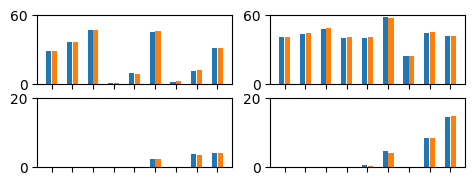

(0.0, 20.0)

In [19]:
figure(figsize=(14*cm, 5*cm))

sobol_dir = "./Sobol_Figs/"

bar_width = 0.5
spacing = 2
sobol_min =  round(1.5 - bar_width/2-0.025, digits=3)
sobol_max =  round(1.5+8*spacing - bar_width/2-0.025, digits=3)

random_min = round(1.5 + bar_width/2+0.025, digits=3)
random_max = round(1.5+8*spacing + bar_width/2+0.025, digits=3)

subplot(2, 2, 1)
bar(sobol_min:spacing:sobol_max, abs.(sobol_stable_tm ./ 100), width=bar_width)
bar(random_min:spacing:random_max, abs.(random_stable_tm ./ 100), width=bar_width)
xticks(1.5:spacing:(1.5+8*spacing), ["", "","", "", "", "","", "", ""])
ylim(0, 60)
yticks([0, 60])

subplot(2, 2, 2)
bar(sobol_min:spacing:sobol_max, abs.(sobol_stable_te ./ 100), width=bar_width)
bar(random_min:spacing:random_max, abs.(random_stable_te ./ 100), width=bar_width)
xticks(1.5:spacing:(1.5+8*spacing), ["", "","", "", "", "","", "", ""])
yticks([0, 60])

ylim(0, 60)

subplot(2, 2, 3)
bar(sobol_min:spacing:sobol_max, abs.(sobol_fragile_tm ./ 100), width=bar_width)
bar(random_min:spacing:random_max, abs.(random_fragile_tm ./ 100), width=bar_width)
xticks(1.5:spacing:(1.5+8*spacing), ["", "","", "", "", "","", "", ""])
yticks([0, 20])

ylim(0, 20)

subplot(2, 2, 4)
bar(sobol_min:spacing:sobol_max, abs.(sobol_fragile_te ./ 100), width=bar_width)
bar(random_min:spacing:random_max, abs.(random_fragile_te ./ 100), width=bar_width)
xticks(1.5:spacing:(1.5+8*spacing), ["", "","", "", "", "","", "", ""])
yticks([0, 20])
ylim(0, 20)
#savefig(sobol_dir*"SobolvRandom.pdf")
#ylim(0, 20)

In [5]:
# We make 4 plots:

# 1. Prevalence of topology among all spacegroups for id_eps = 3
# 2. Change of prevalence of stable topology across dielectric contrasts
# 3. Nodal points for all spacegroups
# 4. Prevalence of stable topology w.r.t filling

In [8]:
symeigs_dir = "./symeigs/"

stable_count = Dict{Tuple{Integer, Integer, String}, Vector{Float64}}()
fragile_count = Dict{Tuple{Integer, Integer, String}, Vector{Float64}}()

cum_stable_count = Dict{Tuple{Integer, Integer, String}, Vector{Float64}}()
cum_fragile_count = Dict{Tuple{Integer, Integer, String}, Vector{Float64}}()

# We divide by 100 since we have 10000 samples per relevant category, so we divide by 10000 and multiply by 100 (to get a percentage)

for sg in [2, 6, 9:17...]
    loaded_data = load(symeigs_dir*"sg$sg-data.jld2")
    merge!(stable_count,  Dict(x => y[1:3] ./ 100 for (x, y) in loaded_data["stable_count"]))
    merge!(fragile_count, Dict(x => y[1:3] ./ 100 for (x, y) in loaded_data["fragile_count"]))
    merge!(cum_stable_count,  Dict(x => y[1:3] ./ 100 for (x, y) in loaded_data["cum_stable_count"]))
    merge!(cum_fragile_count, Dict(x => y[1:3] ./ 100 for (x, y) in loaded_data["cum_fragile_count"]))
end

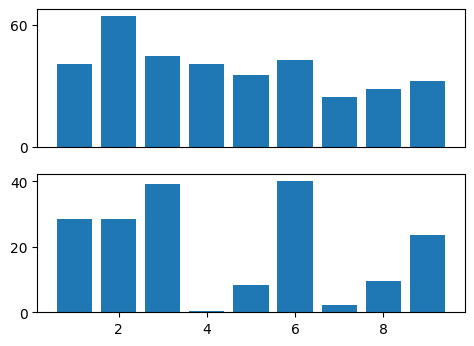

(PyObject <matplotlib.patches.Rectangle object at 0x7f5472f0b520>, PyObject <matplotlib.patches.Rectangle object at 0x7f5472f0b3a0>, PyObject <matplotlib.patches.Rectangle object at 0x7f5472f0ba00>, PyObject <matplotlib.patches.Rectangle object at 0x7f5472f0bcd0>, PyObject <matplotlib.patches.Rectangle object at 0x7f5472f0bfa0>, PyObject <matplotlib.patches.Rectangle object at 0x7f5472f182b0>, PyObject <matplotlib.patches.Rectangle object at 0x7f5472f18580>, PyObject <matplotlib.patches.Rectangle object at 0x7f5472f18850>, PyObject <matplotlib.patches.Rectangle object at 0x7f5472f18b20>)

In [9]:
figure(figsize=(14*cm, 10*cm))
subplot(2, 1, 1)
fig2_stable_data = vcat([cum_stable_count[(sg, 3, "te")] for sg  in [2, 10, 16]]...); # Only plot for the middle dielectric contrast
yticks([0, 60])
xticks([])
bar(1:9, fig2_stable_data)
subplot(2, 1, 2)
fig2_stable_data = vcat([cum_stable_count[(sg, 3, "tm")] for sg  in [2, 10, 16]]...);
bar(1:9, fig2_stable_data)
#savefig("Cumulative-Fig2.pdf")

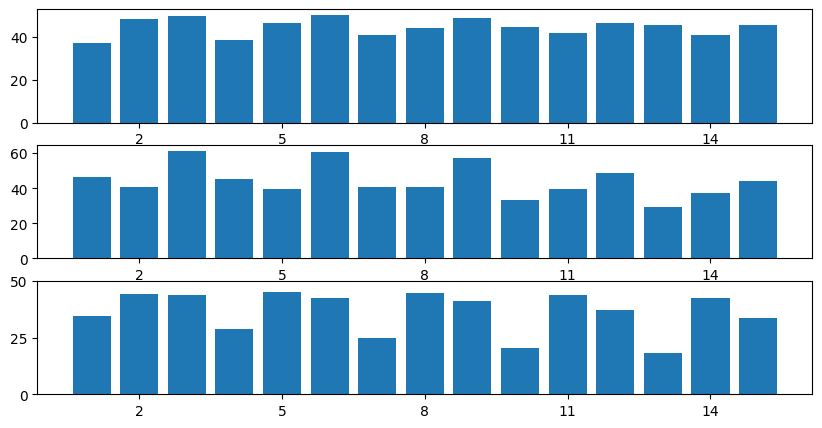

(PyObject[PyObject <matplotlib.axis.XTick object at 0x7f5466a183a0>, PyObject <matplotlib.axis.XTick object at 0x7f5466a18370>, PyObject <matplotlib.axis.XTick object at 0x7f54669fffa0>, PyObject <matplotlib.axis.XTick object at 0x7f5466968dc0>, PyObject <matplotlib.axis.XTick object at 0x7f5466970310>], PyObject[PyObject Text(2, 0, '2'), PyObject Text(5, 0, '5'), PyObject Text(8, 0, '8'), PyObject Text(11, 0, '11'), PyObject Text(14, 0, '14')])

In [22]:
figure(figsize=(10, 5))
subplot(3, 1, 1)
bar(1:15, vcat([stable_count[2, i, "te"] for i in 1:5]...))
xticks(2:3:15)
subplot(3, 1, 2)
bar(1:15, vcat([stable_count[10, i, "te"] for i in 1:5]...))
xticks(2:3:15)

subplot(3, 1, 3)
bar(1:15, vcat([stable_count[16, i, "te"] for i in 1:5]...))
yticks([0, 25, 50])
xticks(2:3:15)
#savefig("")


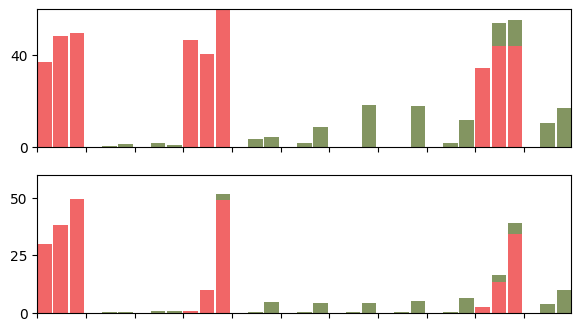

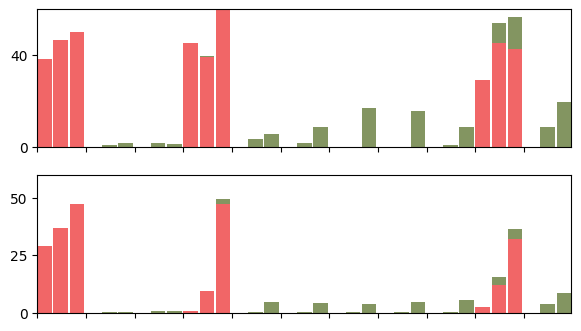

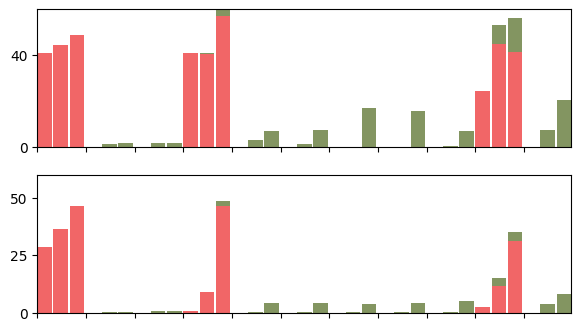

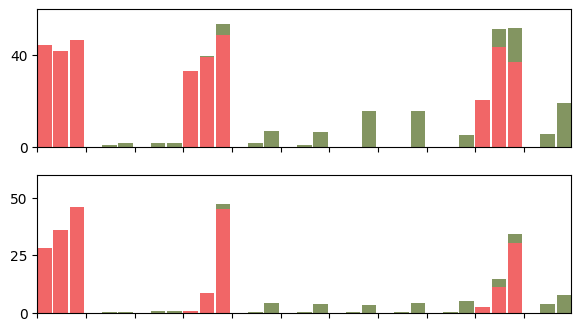

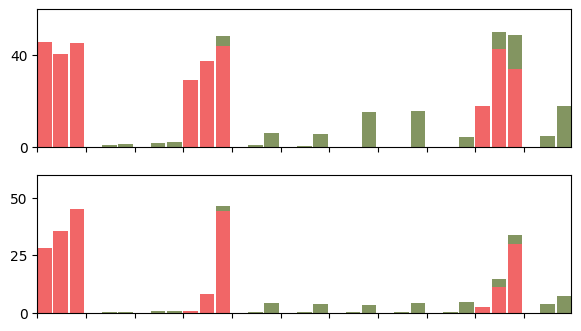

In [23]:
color_stable = "#F16667"
color_fragile = "#839561"
bar_width = 0.9

for contrast_idx in 1:5
    figure(figsize=(17.5*cm, 10*cm))
    subplot(2, 1, 1)
    fig2_stable_data_te = vcat([stable_count[(sg, contrast_idx, "te")] for sg  in [2, 6, 9:17...]]...);
    fig2_fragile_data_te = vcat([fragile_count[(sg, contrast_idx, "te")] for sg  in [2, 6, 9:17...]]...);

    bar(1:33, fig2_stable_data_te, color=color_stable, width=bar_width)
    bar(1:33, fig2_fragile_data_te, bottom = fig2_stable_data_te, color=color_fragile, width=bar_width)
    xticks(0.55:3:33.45, "")
    xlim(0.55, 33.45)
    yticks([0, 40, 70])
    ylim(0, 60)

    subplot(2, 1, 2)
    fig2_stable_data_tm = vcat([stable_count[(sg, contrast_idx, "tm")] for sg  in [2, 6, 9:17...]]...);
    fig2_fragile_data_tm = vcat([fragile_count[(sg, contrast_idx, "tm")] for sg  in [2, 6, 9:17...]]...);

    bar(1:33, fig2_stable_data_tm, color=color_stable, width=bar_width)
    bar(1:33, fig2_fragile_data_tm, bottom = fig2_stable_data_tm, color=color_fragile, width=bar_width);
    xticks(0.55:3:33.45, "");
    xlim(0.55, 33.45 );
    yticks([0, 25, 50])
    ylim(0, 60)
    savefig("Fig2a-Contrast_$(contrast_idx).pdf")
end

In [8]:
maximum(vcat([fragile_count[(sg, 3, "tm")] for sg  in [2, 6, 9:17...]]...) - vcat([fragile_count[(sg, 3, "te")] for sg  in [2, 6, 9:17...]]...))

0.0

In [21]:
# Now we examine how changing the dielectric contrast shifts the prevalence of stable topology

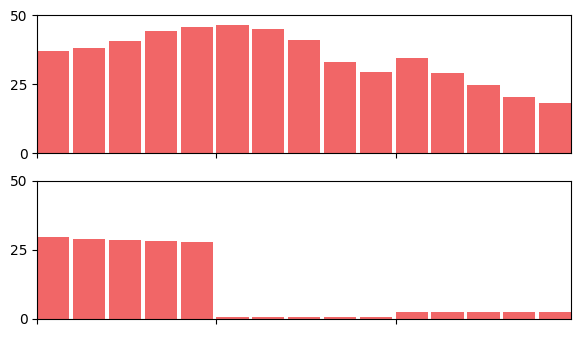

In [67]:
bar_width = 0.9
figure(figsize=(17.5*cm, 10*cm))
subplot(2, 1, 1)

fig_dir = "./Fig2_Statistics_Figs/"


fig2_stable_data = vcat([vcat([stable_count[(sg, id_eps, "te")][1] for id_eps in 1:5]...) for sg in [2, 10, 16]]...);
bar(1:15, fig2_stable_data, color=color_stable, width=bar_width)
ylim(0, 50)
xticks(0.55:5:15.45, "")
xlim(0.55, 15.45)
yticks([0, 25, 50])

subplot(2, 1, 2)

fig2_stable_data = vcat([vcat([stable_count[(sg, id_eps, "tm")][1] for id_eps in 1:5]...) for sg in [2, 10, 16]]...);
bar(1:15, fig2_stable_data, color=color_stable, width=bar_width)
ylim(0, 50)
xticks(0.55:5:15.45, "")
xlim(0.55, 15.45)
yticks([0, 25, 50]);
#savefig(fig_dir*"Fig2-changingeps.pdf");

In [8]:
#This is the 501x501 kmesh we use for the nodal point calculations
#
ks = Vector{Vector{Float64}}()
N = 500
for i in 1:N+1
for j in 1:N+1
    kx = (i-1)/N - 0.5
    ky = (j-1)/N - 0.5
    push!(ks, [kx, ky])
end
end
#=for idx in 1:200
    open("nodal_points/input/kpoints-$idx.sh", "w") do io 
        write(io, "kvecs=(list ")
        for k in ks[idx:200:length(ks)]
            kx, ky = k
            write(io, "(vector3 $(kx) $(ky)) ")
        end
        write(io, ")")
    end
end=#

In [9]:
# Function transforms a vector k that is in the reciprocal basis to the cartesian basis
function wigner_seitz(k::Vector{<:Real}, Gs::ReciprocalBasis)
    b1, b2 = Gs
    kbasis = hcat(b1, b2)
    return kbasis*k
end

wigner_seitz (generic function with 1 method)

In [9]:
sg = 10
id_eps = 2 
mode = "te"
dispersion_dir = "./dispersions/output/sg$sg/eps$(id_eps)/$mode/";
loaded_dispersion_data = load(dispersion_dir*"sg$sg-epsid$(id_eps)-res64-$mode.jld2")


Dict{String, Any} with 3 entries:
  "marginsv"      => [[-0.0747939, 0.0187443, -0.0108244, -0.0663392, 0.0058027…
  "cumsummariesv" => Vector{BandSummary}[[1-band (nontrivial): [X₁, M₂, Γ₁], 2-…
  "dispersionsv"  => [[0.0 0.384797 … 1.39849 1.44114; 0.0297491 0.382231 … 1.3…

In [3]:
good_candidatesv = Dict{Tuple{String, Integer, Integer, Integer}, Float64}[] #mode, id_eps, id, top band, margin (total id including id_eps offset) 
                                                                # This is a vector- each element corresponds to sgs 2, 10, 16 respectively
for sg in [2, 10, 16]
    println("Calculating for sg: $sg"); flush(stdout)
    good_candidates = Dict{Tuple{String, Integer, Integer, Integer}, Float64}() # Dictionary for each space group
    for id_eps in 1:3
        println("Calculating for id_eps: $id_eps"); flush(stdout)
        for mode = ["te", "tm"];
            dispersion_dir = "./dispersions/output/sg$sg/eps$(id_eps)/$mode/";
            loaded_dispersion_data = load(dispersion_dir*"sg$sg-epsid$(id_eps)-res64-$mode.jld2")
            marginsv = loaded_dispersion_data["marginsv"];
            cumsummariesv = loaded_dispersion_data["cumsummariesv"];
            for (id, (margins, cumsummaries)) in enumerate(zip(marginsv, cumsummariesv))
                real_id = id + (10000)*(id_eps-1)
                for (cumsum_idx, (margin, cumsummary)) in enumerate(zip(margins, cumsummaries))
                    if cumsum_idx <= 3 # We only want candidates with nontrivial bands at low frequencies
                        cumsummary.topology == NONTRIVIAL || continue
                        top_band = cumsummary.band[end]
                        push!(good_candidates, (mode, id_eps, real_id, top_band) => margin)
                    end
                end
            end
        end
    end
    push!(good_candidatesv, good_candidates)
end

Calculating for sg: 2
Calculating for id_eps: 1
Calculating for id_eps: 2
Calculating for id_eps: 3
Calculating for sg: 10
Calculating for id_eps: 1
Calculating for id_eps: 2
Calculating for id_eps: 3
Calculating for sg: 16
Calculating for id_eps: 1
Calculating for id_eps: 2
Calculating for id_eps: 3


In [4]:
nodal_point_calcnames = String[]
nodal_point_data = Dict{String, Tuple{Float64, Integer, String, Integer, Integer}}() # margin, id_eps, mode, id, top_band 
for (good_candidates, sg) in zip(good_candidatesv, [2, 10, 16])
    best_candidates = collect(sort(good_candidates, byvalue=true, rev=true))
    for best_candidate in best_candidates[1:10]
        (mode, id_eps, id, band), margin = best_candidate #findmax(good_candidates)
        push!(nodal_point_data, "dim2-sg$sg-$id-res64-$mode" => (margin, id_eps, mode, id, band))
        push!(nodal_point_calcnames, "dim2-sg$sg-$id-res64-$mode")
    end
end

In [14]:
filter(x -> MPBUtils.parse_sgnum(x[1]) == 16, nodal_point_data)

Dict{String, Tuple{Float64, Integer, String, Integer, Integer}} with 10 entries:
  "dim2-sg16-18375-res64-te" => (0.0261381, 2, "te", 18375, 8)
  "dim2-sg16-458-res64-te"   => (0.0276365, 1, "te", 458, 9)
  "dim2-sg16-18359-res64-te" => (0.0296464, 2, "te", 18359, 8)
  "dim2-sg16-9809-res64-te"  => (0.0252085, 1, "te", 9809, 8)
  "dim2-sg16-13902-res64-te" => (0.023076, 2, "te", 13902, 8)
  "dim2-sg16-4498-res64-te"  => (0.0233921, 1, "te", 4498, 8)
  "dim2-sg16-28359-res64-te" => (0.0238766, 3, "te", 28359, 8)
  "dim2-sg16-28375-res64-te" => (0.0241641, 3, "te", 28375, 8)
  "dim2-sg16-145-res64-te"   => (0.0279107, 1, "te", 145, 9)
  "dim2-sg16-9993-res64-tm"  => (0.0233177, 1, "tm", 9993, 6)

In [15]:
nodal_point_data

Dict{String, Tuple{Float64, Integer, String, Integer, Integer}} with 30 entries:
  "dim2-sg16-18375-res64-te" => (0.0261381, 2, "te", 18375, 8)
  "dim2-sg16-458-res64-te"   => (0.0276365, 1, "te", 458, 9)
  "dim2-sg10-12143-res64-te" => (0.0528062, 2, "te", 12143, 4)
  "dim2-sg16-4498-res64-te"  => (0.0233921, 1, "te", 4498, 8)
  "dim2-sg2-25798-res64-te"  => (0.274133, 3, "te", 25798, 2)
  "dim2-sg2-29481-res64-te"  => (0.282335, 3, "te", 29481, 2)
  "dim2-sg2-22469-res64-te"  => (0.258022, 3, "te", 22469, 2)
  "dim2-sg2-10482-res64-te"  => (0.252958, 2, "te", 10482, 2)
  "dim2-sg10-20683-res64-te" => (0.0552442, 3, "te", 20683, 4)
  "dim2-sg16-28375-res64-te" => (0.0241641, 3, "te", 28375, 8)
  "dim2-sg2-21585-res64-te"  => (0.278525, 3, "te", 21585, 2)
  "dim2-sg16-28359-res64-te" => (0.0238766, 3, "te", 28359, 8)
  "dim2-sg16-9993-res64-tm"  => (0.0233177, 1, "tm", 9993, 6)
  "dim2-sg16-13902-res64-te" => (0.023076, 2, "te", 13902, 8)
  "dim2-sg10-10683-res64-te" => (0.0520925, 2, 

In [21]:
mode = "te"
epsid = 2
sg = 16
loaded_data = load("dispersions/output/sg$sg/eps$epsid/$mode/sg$sg-epsid$epsid-res64-$mode.jld2")

Dict{String, Any} with 3 entries:
  "marginsv"      => [[-0.233415, 0.0304076, 0.106617, -0.00263705, -0.0358287,…
  "cumsummariesv" => Vector{BandSummary}[[2-band (trivial): [M₁+M₂, Γ₁+Γ₂, K₂K₃…
  "dispersionsv"  => [[0.0 0.650174 … 2.15163 2.15217; 0.0463504 0.649293 … 2.1…

In [22]:
loaded_data["cumsummariesv"][8375]

10-element Vector{BandSummary}:
 1-band (nontrivial): [M₂, Γ₁, K₁]
 6-band (nontrivial): [3M₁+3M₂, 2Γ₁+Γ₃Γ₅+Γ₄Γ₆, 2K₁+2K₂K₃]
 8-band (nontrivial): [4M₁+4M₂, 3Γ₁+Γ₂+Γ₃Γ₅+Γ₄Γ₆, 2K₁+3K₂K₃]
 10-band (trivial): [5M₁+5M₂, 3Γ₁+Γ₂+Γ₃Γ₅+2Γ₄Γ₆, 4K₁+3K₂K₃]
 12-band (trivial): [5M₁+7M₂, 3Γ₁+Γ₂+2Γ₃Γ₅+2Γ₄Γ₆, 4K₁+4K₂K₃]
 13-band (trivial): [5M₁+8M₂, 3Γ₁+2Γ₂+2Γ₃Γ₅+2Γ₄Γ₆, 5K₁+4K₂K₃]
 18-band (nontrivial): [10M₁+8M₂, 3Γ₁+3Γ₂+4Γ₃Γ₅+2Γ₄Γ₆, 6K₁+6K₂K₃]
 26-band (nontrivial): [12M₁+14M₂, 5Γ₁+5Γ₂+4Γ₃Γ₅+4Γ₄Γ₆, 8K₁+9K₂K₃]
 29-band (trivial): [14M₁+15M₂, 6Γ₁+5Γ₂+5Γ₃Γ₅+4Γ₄Γ₆, 9K₁+10K₂K₃]
 34-band (nontrivial): [17M₁+17M₂, 6Γ₁+6Γ₂+5Γ₃Γ₅+6Γ₄Γ₆, 12K₁+11K₂K₃]

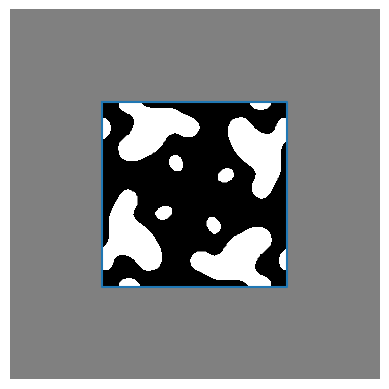

(-1.5:0.006012024048096192:1.5, [-0.8070800000000006 -0.8000651205410879 … -0.8000651205410878 -0.8070800000000006; -0.8000651205410876 -0.7931258522754872 … -0.793125852275487 -0.8000651205410878; … ; -0.8000651205410878 -0.793125852275487 … -0.7931258522754872 -0.8000651205410876; -0.8070800000000006 -0.8000651205410878 … -0.8000651205410879 -0.8070800000000006], 0.2896961634357333)

In [58]:
loaded_data = load("symeigs/output/sg10/eps1/te/sg10-epsid1-res64-te-input.jld2")
isovalv = loaded_data["isovalv"]
flatv = loaded_data["flatv"]
idx = 683
Rsv = loaded_data["Rsv"];
Rs, flat, isoval = Rsv[idx], flatv[idx], isovalv[idx]
wigner_cell = wignerseitz(Rs)
fig = figure()
wigner_plot(flat, Rs, wigner_cell; isoval=isoval, fig=fig, ax=gca(), in_polygon=true, xyz = range(-1.5, 1.5, length=500), N=500, translation_vector=[0, 0])


In [21]:
margin, id_eps, mode, real_id, top_band = nodal_point_data[nodal_point_calcname]
println(top_band)
band1 = zeros(501*501)
band2 = zeros(501*501)
all_bands = zeros(501*501, 11)
for idx in 1:200
    dispersion = readdlm("nodal_points/output/$nodal_point_calcname-$idx-dispersion.out", ',', Float64)
    dispersion = sort(dispersion[:, 6:end], dims = 2)
    lower_dispersion = dispersion[:, top_band]
    upper_dispersion = dispersion[:, top_band+1]
    gap = minimum(upper_dispersion - lower_dispersion)
    gap < 0 && (println("Negative Gap at idx: $idx"); flush(stdout); println(argmin(upper_dispersion - lower_dispersion)))
    band1[idx:200:end] =  lower_dispersion 
    band2[idx:200:end] =  upper_dispersion 
    all_bands[idx:200:end, :] = dispersion
end


2


In [24]:
key = "dim2-sg16-458-res64-te" 
b = readdlm("./wilson_loops/output/$key-phases.out", ',')[7:end]
sum(b[end-8:end])/pi

0.999998893020681

In [31]:
num_successes = 0
for (key, val) in nodal_point_data
    #MPBUtils.parse_sgnum(key) != 16 || continue
    top_band = val[5]
    berry_phases = readdlm("./wilson_loops/output/$key-phases.out", ',')[7:end]
    
    berry_sum = sum(berry_phases[Int(top_band*(top_band+1)/2-1)-top_band+1:Int(top_band*(top_band+1)/2-1)])
    #=if top_band == 4
        sum(berry_phases[6:9]) 
    elseif top_band == 5
        sum(berry_phases[10:14]) 
    elseif top_band == 2
        sum(berry_phases[1:2]) 
    end=#
    println(key)
    berry_phase = mod(round(berry_sum/pi, digits=3), 2)
    println("Berry Phase: ", berry_phase ); flush(stdout)
    isequal(berry_phase, 1) || error("Incorrect Berry Phase")
    num_successes += 1
end
num_successes == 30 || error("Some Didn't Succeed")

dim2-sg16-18375-res64-te
Berry Phase: 1.0
dim2-sg16-458-res64-te
Berry Phase: 1.0
dim2-sg10-12143-res64-te
Berry Phase: 1.0
dim2-sg16-4498-res64-te
Berry Phase: 1.0
dim2-sg2-25798-res64-te
Berry Phase: 1.0
dim2-sg2-29481-res64-te
Berry Phase: 1.0
dim2-sg2-22469-res64-te
Berry Phase: 1.0
dim2-sg2-10482-res64-te
Berry Phase: 1.0
dim2-sg10-20683-res64-te
Berry Phase: 1.0
dim2-sg16-28375-res64-te
Berry Phase: 1.0
dim2-sg2-21585-res64-te
Berry Phase: 1.0
dim2-sg16-28359-res64-te
Berry Phase: 1.0
dim2-sg16-9993-res64-tm
Berry Phase: 1.0
dim2-sg16-13902-res64-te
Berry Phase: 1.0
dim2-sg10-10683-res64-te
Berry Phase: 1.0
dim2-sg16-145-res64-te
Berry Phase: 1.0
dim2-sg10-13730-res64-te
Berry Phase: 1.0
dim2-sg10-15403-res64-te
Berry Phase: 1.0
dim2-sg2-23907-res64-te
Berry Phase: 1.0
dim2-sg16-18359-res64-te
Berry Phase: 1.0
dim2-sg10-23364-res64-te
Berry Phase: 1.0
dim2-sg2-28730-res64-te
Berry Phase: 1.0
dim2-sg10-4531-res64-te
Berry Phase: 1.0
dim2-sg2-19491-res64-te
Berry Phase: 1.0
dim2-sg

true

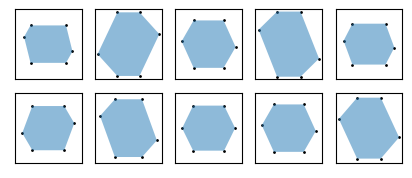

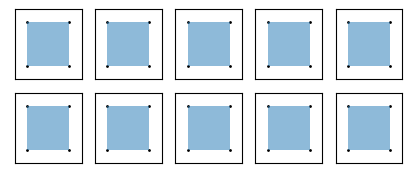

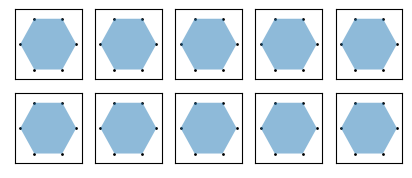

In [23]:
#Plotting the shapes of the Brillouin zones- note that for spacegroup 2, the brillouin zones are all different
#Since we have a free parameter
for (i, nodal_point_calcname) in enumerate(nodal_point_calcnames)
    if i == 1 || i == 11 || i == 21
        figure(figsize=(5, 2))
    end
    
    subplot(2, 5, mod(i, 10) + 1)
    xs = Float64[]
    ys = Float64[]

    Rs = first(lattice_from_mpbparams("./nodal_points/input/"*nodal_point_calcname*".sh"))
    Gs = reciprocalbasis(Rs)
    verts = wignerseitz(Gs).verts;
    faces = wignerseitz(Gs).faces;
    for vert in verts
        x, y = Gs[1]*vert[1] + Gs[2]*vert[2]
        scatter(x, y, color="black", s =1)
        push!(xs, x)
        push!(ys, y)
    end
    fill(xs, ys, alpha=0.5)
    xlim(-5, 5)
    ylim(-5, 5)
    xticks(Float64[])
    yticks(Float64[])
end

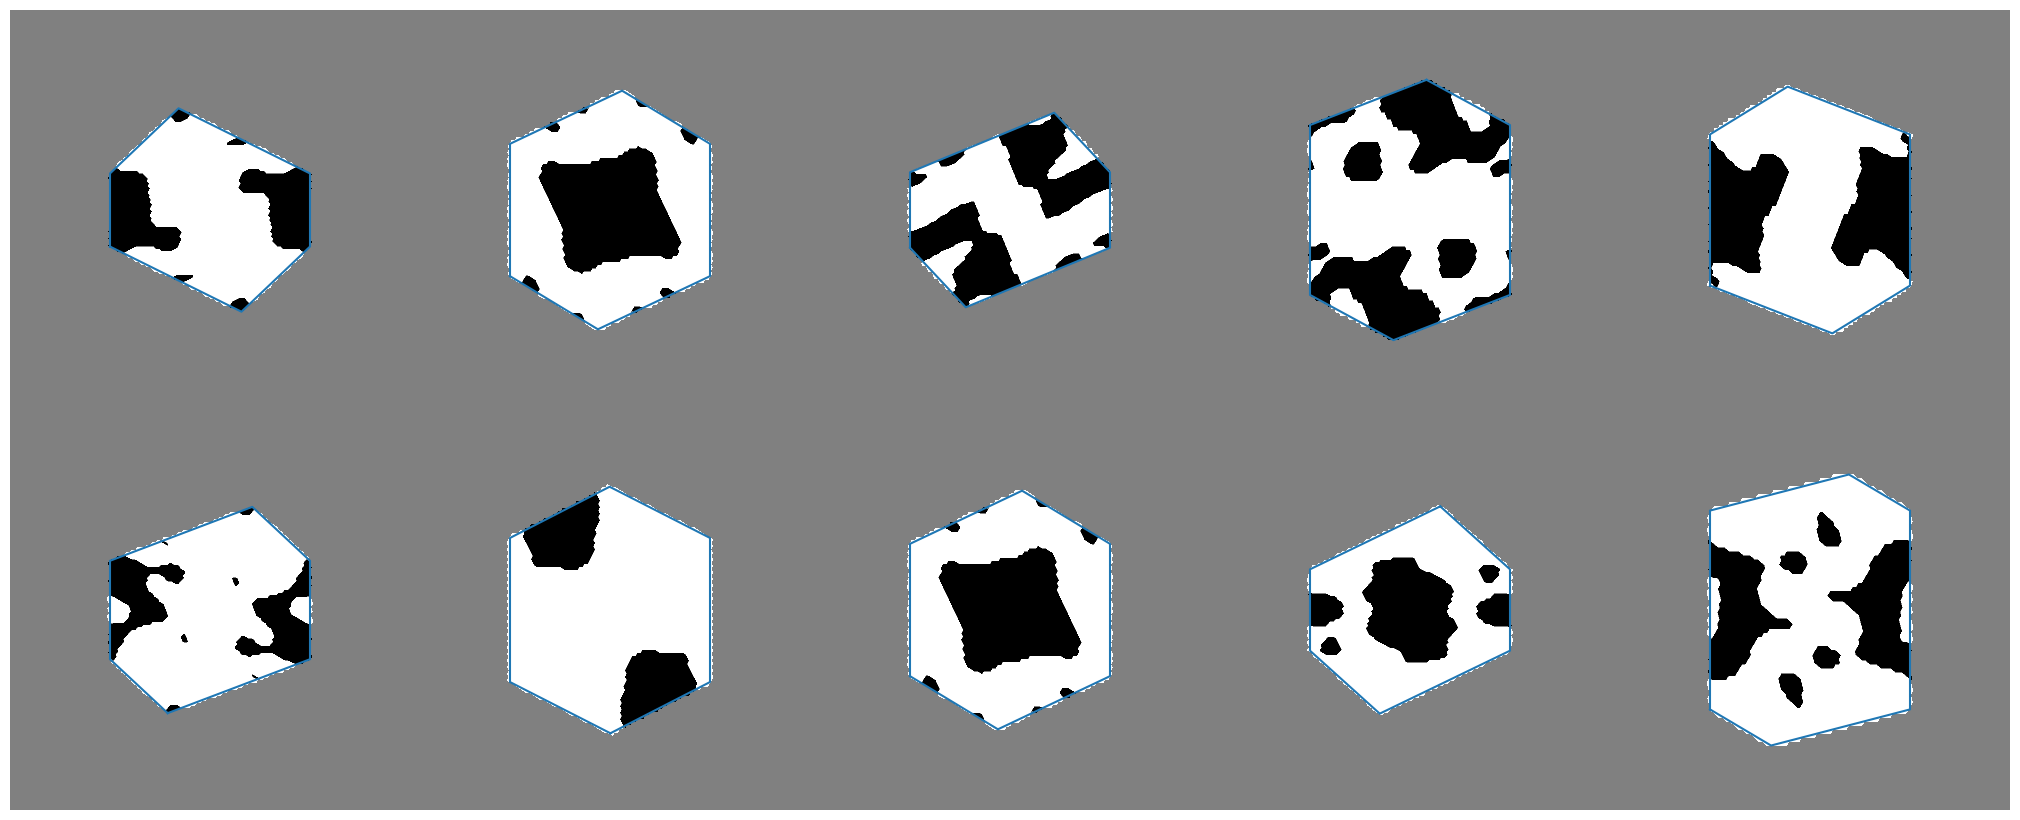

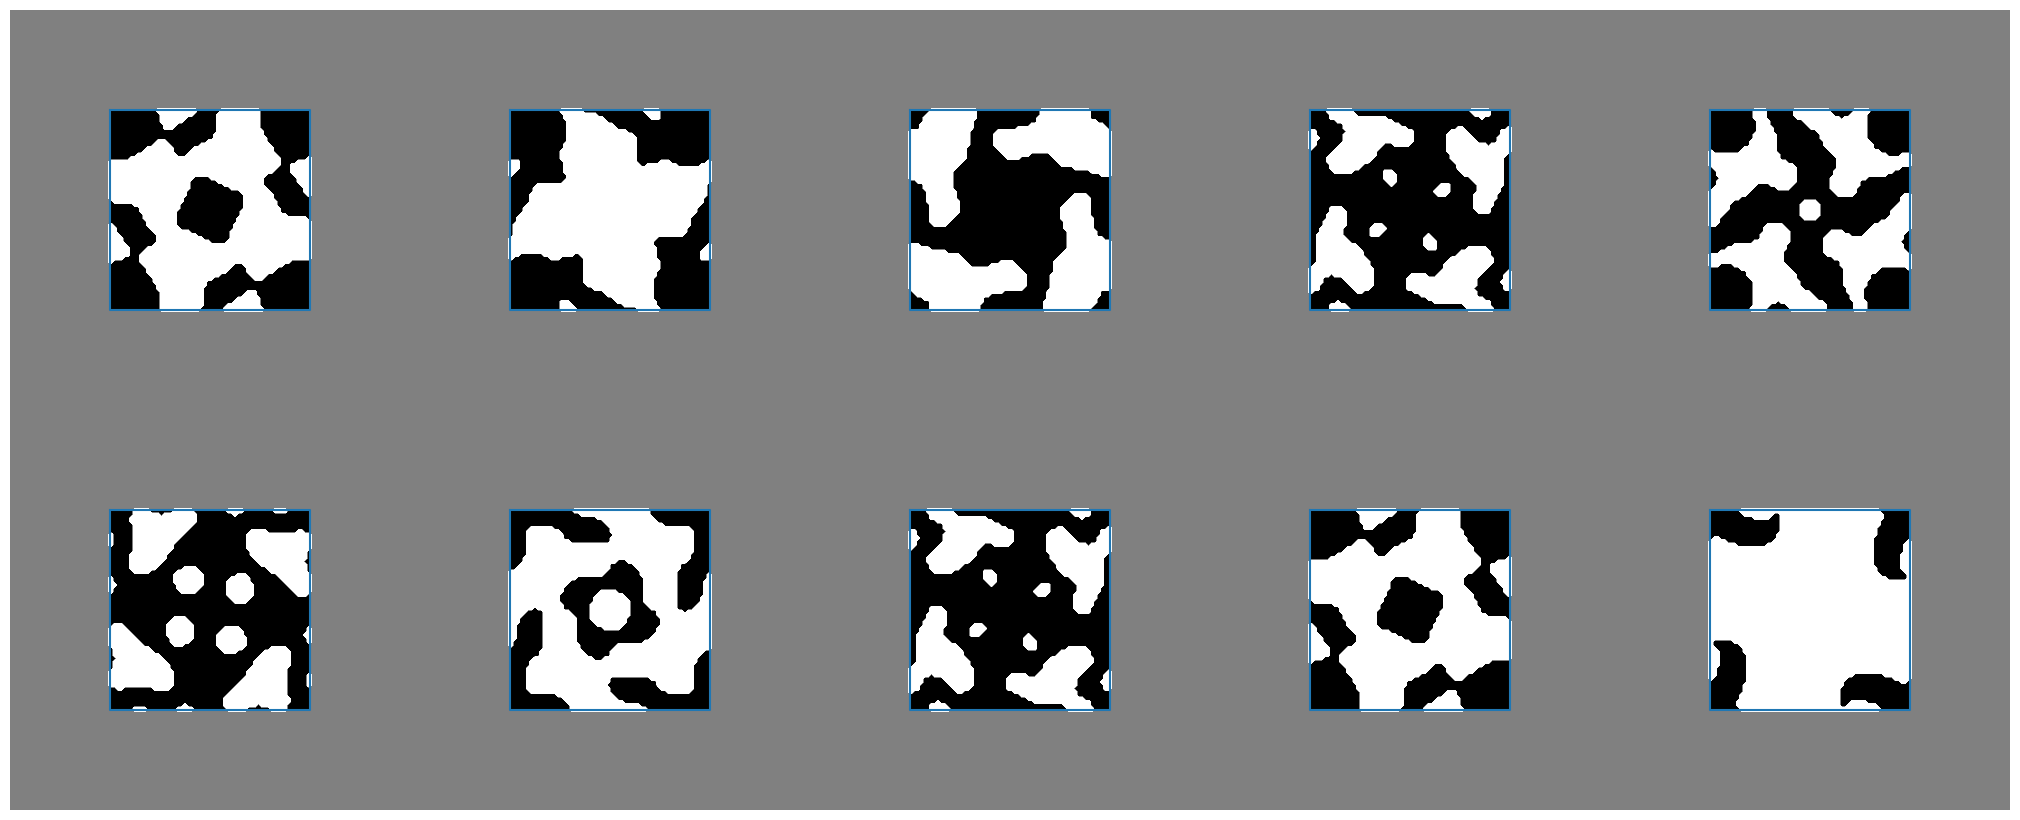

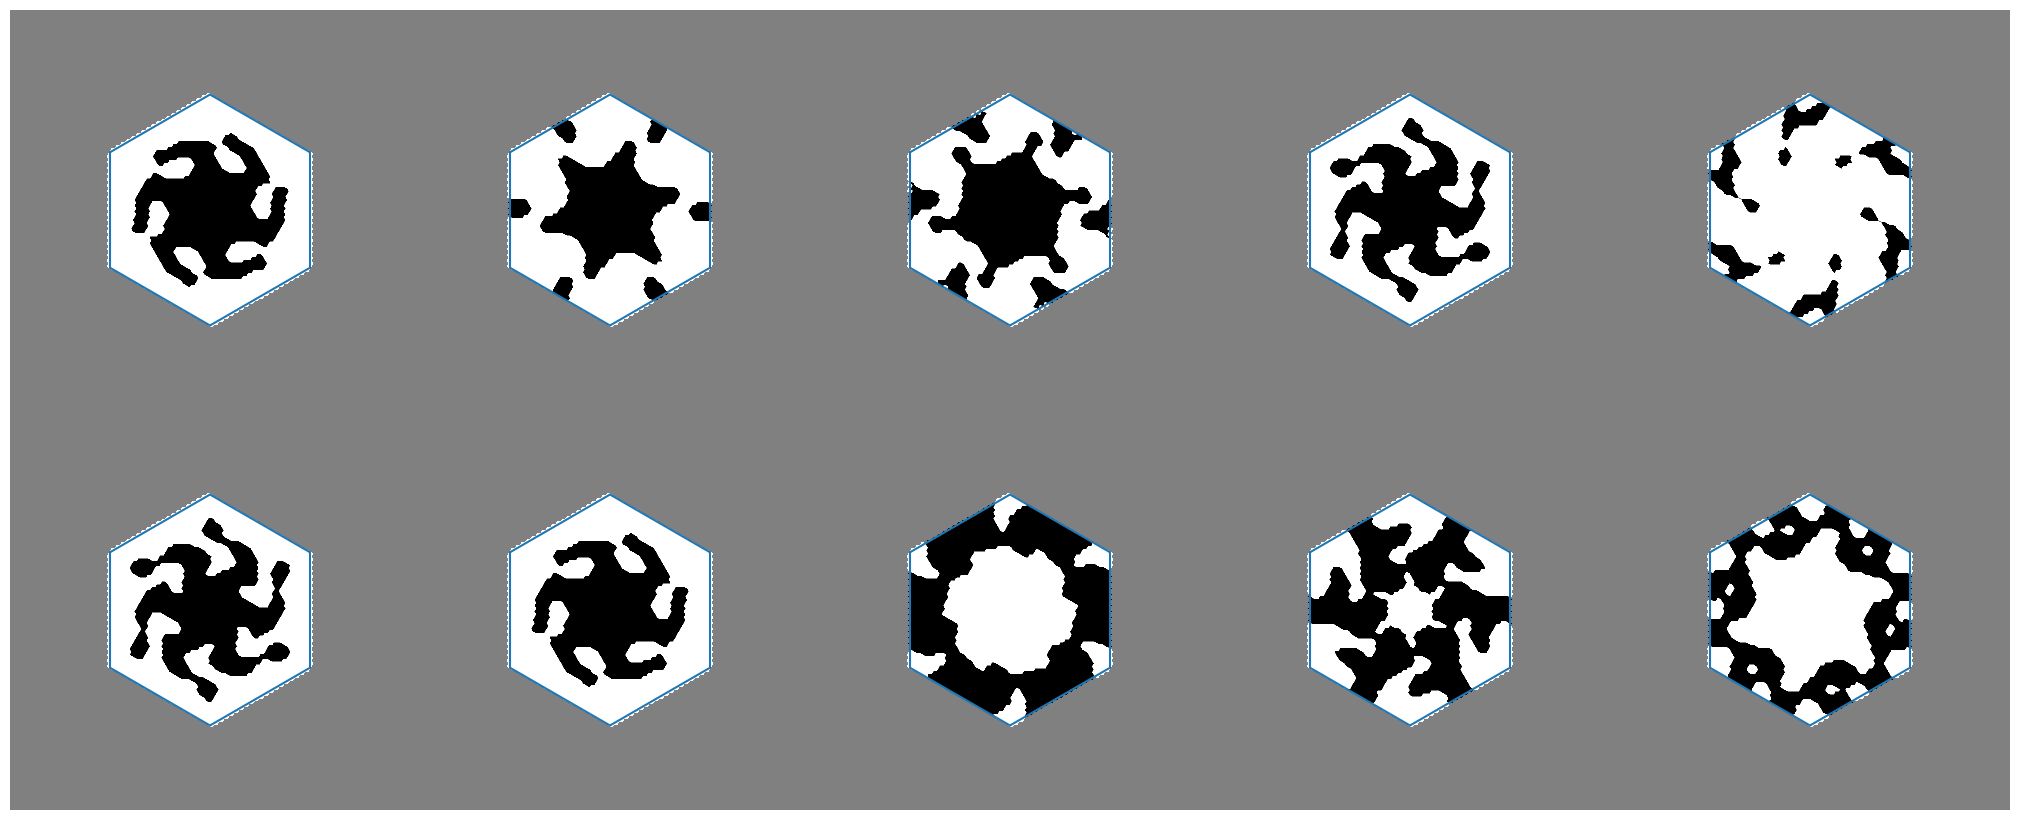

In [74]:
for (i, nodal_point_calcname) in enumerate(nodal_point_calcnames)
    fig = if (i == 1 || i == 11 || i == 21)
        figure(figsize=(40, 20))
    else
        gcf()
    end
    j = mod(i, 10)
    j = (j == 0 ? 10 : j)
    row = j > 5 ? 1 : 2
    column = mod(j, 5)
    column = (column == 0 ? 5 : column)
    ax = fig.add_axes([column*0.1, row*0.2, 0.1, 0.2])
    title =
    if i == 1
        "SG 2 Candidates"
    elseif i == 11
        "SG 10 Candidates"
    elseif i == 21
        "SG 16 Candidates"
    else 
        " " 
    end
    calcname = "./dispersions/input/"*nodal_point_calcname*".sh"
    Rs, flat, isoval, _ = lattice_from_mpbparams(calcname)
    wigner_cell = wignerseitz(Rs)
    wigner_plot(flat, Rs, wigner_cell; isoval=isoval, fig=fig, ax=gca(), in_polygon=true, xyz = range(-2.5, 2.5, length=300),  N=100, translation_vector=[0, 0])
end

In [139]:
#=for nodal_point_calcname in nodal_point_calcnames
    cp("./dispersions/input/$nodal_point_calcname", "./nodal_points/input/$nodal_point_calcname")
end=#

dim2-sg2-29481-res64-te
2
dim2-sg2-20482-res64-te


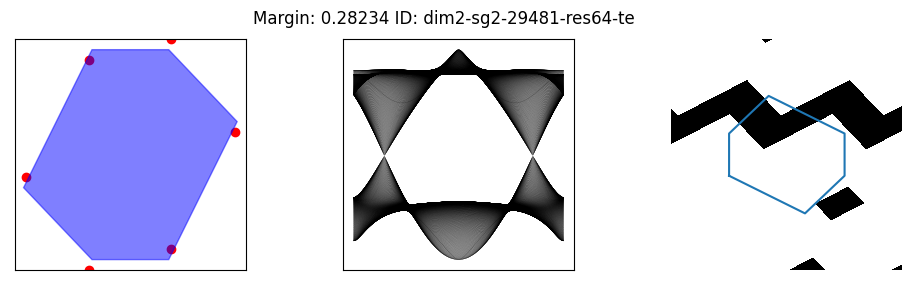

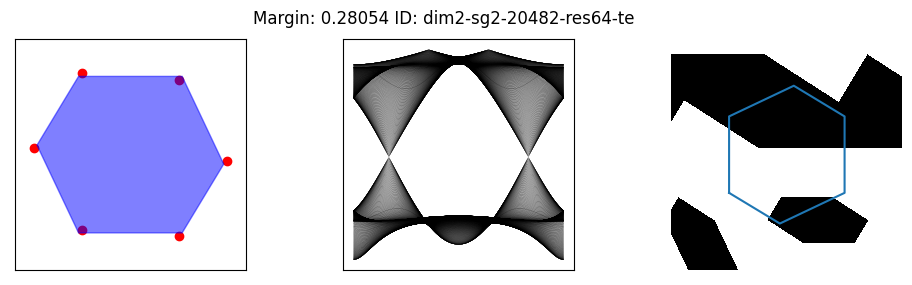

2


In [86]:
for nodal_point_calcname in nodal_point_calcnames[1:2]
    println(nodal_point_calcname); flush(stdout)
    num_nodal_points = 
        if MPBUtils.parse_sgnum(nodal_point_calcname) == 2
            2
        elseif MPBUtils.parse_sgnum(nodal_point_calcname) == 10 
            4
        else 
            6
        end
    
    fig = figure(figsize=(12,3))
    subplot(1, 3, 1)
    margin, id_eps, mode, real_id, top_band = nodal_point_data[nodal_point_calcname]
    println(top_band)
    band1 = zeros(501*501)
    band2 = zeros(501*501)
    all_bands = zeros(501*501, 11)
    for idx in 1:200
        dispersion = readdlm("nodal_points/output/$nodal_point_calcname-$idx-dispersion.out", ',', Float64)
        dispersion = sort(dispersion[:, 6:end], dims = 2)
        lower_dispersion = dispersion[:, top_band]
        upper_dispersion = dispersion[:, top_band+1]
        gap = minimum(upper_dispersion - lower_dispersion)
        gap < 0 && (println("Negative Gap at idx: $idx"); flush(stdout); println(argmin(upper_dispersion - lower_dispersion)))
        band1[idx:200:end] =  lower_dispersion 
        band2[idx:200:end] =  upper_dispersion 
        all_bands[idx:200:end, :] = dispersion
    end
    xs = Float64[]
    ys = Float64[]
    
    Rs, flat, isoval, _= lattice_from_mpbparams("./nodal_points/input/"*nodal_point_calcname*".sh")
    Gs = reciprocalbasis(Rs)
    verts = wignerseitz(Gs).verts;
    faces = wignerseitz(Gs).faces;
    for vert in verts
        x, y = Gs[1]*vert[1] + Gs[2]*vert[2]
        #scatter(x, y, color="black")
        push!(xs, x)
        push!(ys, y)
    end
    fill(xs, ys, alpha=0.5, color="blue")
    xlim(-5, 5)
    ylim(-5, 5)
    xticks(Float64[])
    yticks(Float64[])
    theta = 2π/num_nodal_points
    rotation_matrix = [cos(theta) -sin(theta); sin(theta) cos(theta)]
    #nodal_point_locations = ks[sortperm(band2-band1)[1:num_nodal_points]]
    nodal_point_value = band1[argmin(band2 - band1)]
    for idx_1 in -1:1
        for idx_2 in -1:1
            for i in 1:num_nodal_points
                k = (rotation_matrix^i) * wigner_seitz(ks[argmin(band2-band1)] + [idx_1, idx_2], Gs)
                #k in nodal_point_locations
                scatter(k..., color="red")
            end
            #X = [k[1] for k in wigner_seitz.([k + [idx_1, idx_2] for k in ks], Ref(Gs))]
            #Y = [k[2] for k in wigner_seitz.([k + [idx_1, idx_2] for k in ks], Ref(Gs))]
            #X = reshape(X, (501, 501))
            #Y = reshape(Y, (501, 501));
            #contour(X, Y, reshape(log.(band2 .- nodal_point_value), (501, 501)), 0, cmap="hot")
        end
    end
    suptitle("Margin: $(round(margin, digits=5)) ID: $nodal_point_calcname")
    
    xleft, xright = gca().get_xlim()
    ydown, yup = gca().get_ylim()
    gca().set_aspect((xright-xleft)/(yup-ydown))

    subplot(1, 3, 2)
    for yidx in 1:501
        plot(reshape(band2, (501, 501))[1:501, yidx], color="black", linewidth=0.1)
        plot(reshape(band1, (501, 501))[1:501, yidx], color="black", linewidth=0.1)
    end
    xleft, xright = gca().get_xlim()
    ydown, yup = gca().get_ylim()
    gca().set_aspect((xright-xleft)/(yup-ydown))

    
    xticks(Float64[])
    yticks(Float64[])
    subplot(1, 3, 3)

    wigner_cell = wignerseitz(Rs)
    wigner_plot(flat, Rs, wigner_cell; isoval=isoval, fig=fig, ax=gca(), translation_vector=[0, 0.5], xyz = range(-2, 2, length=10))
    #savefig("$(nodal_point_calcname)_nodal_point.pdf")
end